In [1]:
#Importing the required libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [2]:
#Loading the datasets

confirmed_cases=pd.read_csv('C:/Users/Hp/Desktop/Intern Prep/Project/LR/datasets/time_series_covid_19_confirmed.csv')
deaths_reported=pd.read_csv('C:/Users/Hp/Desktop/Intern Prep/Project/LR/datasets/time_series_covid_19_deaths.csv')
recovered_cases=pd.read_csv('C:/Users/Hp/Desktop/Intern Prep/Project/LR/datasets/time_series_covid_19_recovered.csv')

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [4]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


In [5]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646


In [6]:
print(confirmed_cases.isnull().sum());

Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64


In [7]:
#Extracting all the columns using the .keys() function

cols=confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', length=498)

In [8]:
#Extracting only the date columns after 1/1/21 that have information of confirmed cases, death and recovered cases

confirmed=confirmed_cases.loc[: , '1/1/21':'5/29/21']
deaths=deaths_reported.loc[: , '1/1/21':'5/29/21']
recoveries=recovered_cases.loc[: , '1/1/21':'5/29/21']
difference_confirmed=confirmed_cases['12/31/20']
difference_deaths=deaths_reported['12/31/20']
difference_recoveries=recovered_cases['12/31/20']

In [9]:
confirmed.isnull().sum()

1/1/21     0
1/2/21     0
1/3/21     0
1/4/21     0
1/5/21     0
          ..
5/25/21    0
5/26/21    0
5/27/21    0
5/28/21    0
5/29/21    0
Length: 149, dtype: int64

In [10]:
#removing any null values if present
confirmed=confirmed.dropna()
print(confirmed)

     1/1/21  1/2/21  1/3/21  1/4/21  1/5/21  1/6/21  1/7/21  1/8/21  1/9/21  \
0     51526   51526   51526   53011   53105   53105   53207   53332   53400   
1     58316   58991   59438   59623   60283   61008   61705   62378   63033   
2     99897  100159  100408  100645  100873  101120  101382  101657  101913   
3      8117    8166    8192    8249    8308    8348    8348    8489    8586   
4     17568   17608   17642   17684   17756   17864   17974   18066   18156   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
271    1474    1482    1494    1497    1504    1505    1509    1512    1513   
272  139223  140287  141219  142228  143169  144257  145252  146074  146701   
273    2101    2101    2101    2101    2101    2102    2104    2104    2104   
274   20997   21230   21582   21993   22645   23495   24297   25326   26567   
275   14084   14491   15265   15829   17194   17804   18675   19660   20499   

     1/10/21  ...  5/20/21  5/21/21  5/22/21  5/23/

In [11]:
for i in confirmed:
    confirmed[i]=confirmed[i]-difference_confirmed
for i in deaths:
    deaths[i]=deaths[i]-difference_deaths
for i in recoveries:
    recoveries[i]=recoveries[i]-difference_recoveries

In [12]:
#Finding the total confirmed cases, deaths and the recovered cases and appending them to 4 empty lists
#Calculating the total mortality rate which is the death_sum/confirmed cases

dates=confirmed.keys()
world_cases=[]
total_deaths=[]
mortality_rate=[]
total_recovered=[]

for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovered_sum=recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [13]:
confirmed_sum

86391959

In [14]:
death_sum

1708607

In [15]:
recovered_sum

60108042

In [16]:
world_cases

[533018,
 1159377,
 1692173,
 2246291,
 2986413,
 3769785,
 4650622,
 5453844,
 6214838,
 6803972,
 7423902,
 8129410,
 8877798,
 9633026,
 10400213,
 11039357,
 11568569,
 12083635,
 12692061,
 13384998,
 14041321,
 14700382,
 15268506,
 15714160,
 16211500,
 16767738,
 17366099,
 17980350,
 18570793,
 19086123,
 19467762,
 19914536,
 20372493,
 20894474,
 21361381,
 21896809,
 22268934,
 22667012,
 22982905,
 23410938,
 23846679,
 24288144,
 24716833,
 25090134,
 25383984,
 25667150,
 26018170,
 26413725,
 26817241,
 27229760,
 27600215,
 27914661,
 28203099,
 28591952,
 29036888,
 29484366,
 29927405,
 30316635,
 30620144,
 30926008,
 31236296,
 31677438,
 32130487,
 32577541,
 32988074,
 33356386,
 33655109,
 34069774,
 34536853,
 35013749,
 35503077,
 35957193,
 36317578,
 36666479,
 37139492,
 37678777,
 38232500,
 38794179,
 39292999,
 39716314,
 40133135,
 40647380,
 41280961,
 41932311,
 42573662,
 43158254,
 43628212,
 44086617,
 44654890,
 45338095,
 46049882,
 46683621,
 47

In [17]:
#Converting all the dates and the cases in the form of a numpy array

days_since_2_21=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [18]:
days_since_2_21

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [19]:
world_cases

array([[  533018],
       [ 1159377],
       [ 1692173],
       [ 2246291],
       [ 2986413],
       [ 3769785],
       [ 4650622],
       [ 5453844],
       [ 6214838],
       [ 6803972],
       [ 7423902],
       [ 8129410],
       [ 8877798],
       [ 9633026],
       [10400213],
       [11039357],
       [11568569],
       [12083635],
       [12692061],
       [13384998],
       [14041321],
       [14700382],
       [15268506],
       [15714160],
       [16211500],
       [16767738],
       [17366099],
       [17980350],
       [18570793],
       [19086123],
       [19467762],
       [19914536],
       [20372493],
       [20894474],
       [21361381],
       [21896809],
       [22268934],
       [22667012],
       [22982905],
       [23410938],
       [23846679],
       [24288144],
       [24716833],
       [25090134],
       [25383984],
       [25667150],
       [26018170],
       [26413725],
       [26817241],
       [27229760],
       [27600215],
       [27914661],
       [2820

In [20]:
total_deaths

array([[   9663],
       [  18096],
       [  25437],
       [  35586],
       [  50921],
       [  65974],
       [  80914],
       [  96080],
       [ 108865],
       [ 117213],
       [ 127537],
       [ 144641],
       [ 161347],
       [ 176718],
       [ 191829],
       [ 205077],
       [ 213741],
       [ 223167],
       [ 239750],
       [ 257656],
       [ 274445],
       [ 290466],
       [ 303760],
       [ 312728],
       [ 323496],
       [ 340804],
       [ 357484],
       [ 374535],
       [ 389482],
       [ 403068],
       [ 411058],
       [ 421276],
       [ 436112],
       [ 451840],
       [ 464374],
       [ 480945],
       [ 491082],
       [ 499068],
       [ 507400],
       [ 522937],
       [ 536340],
       [ 549814],
       [ 562287],
       [ 572092],
       [ 578454],
       [ 585348],
       [ 596266],
       [ 607605],
       [ 618975],
       [ 630023],
       [ 638535],
       [ 644415],
       [ 651364],
       [ 662544],
       [ 674547],
       [ 6

In [21]:
total_recovered

array([[  280378],
       [  581670],
       [  850152],
       [ 1140560],
       [ 1455921],
       [ 1769046],
       [ 2092977],
       [ 2390240],
       [ 2720485],
       [ 2991035],
       [ 3281323],
       [ 3624880],
       [ 3990941],
       [ 4363786],
       [ 4684408],
       [ 5001463],
       [ 5317178],
       [ 5635931],
       [ 6038875],
       [ 6366646],
       [ 6732785],
       [ 7114542],
       [ 7431035],
       [ 7741992],
       [ 8056433],
       [ 8385976],
       [ 8726745],
       [ 9042404],
       [ 9406511],
       [ 9757677],
       [10046576],
       [10319218],
       [10669408],
       [10999255],
       [11293244],
       [11574531],
       [11869088],
       [12146523],
       [12379357],
       [12750965],
       [13020273],
       [13296358],
       [13583957],
       [13830200],
       [14025631],
       [14314244],
       [14549649],
       [14843590],
       [15080208],
       [15314844],
       [15584060],
       [15801317],
       [1598

In [22]:
#Future forecasting for the next 10 days

days_in_future=10
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-10]

In [23]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [24]:
#Converting all integers to datetime for better visualisation

start='1/1/2021'
start_date=datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates=[]
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [25]:
#For visualization with the latest data of 29th May 2021

latest_confirmed=confirmed_cases[dates[-1]]
latest_deaths=deaths_reported[dates[-1]]
latest_recoveries=recovered_cases[dates[-1]]

In [26]:
latest_confirmed

0       70111
1      132297
2      128456
3       13693
4       34180
        ...  
271      6908
272    307838
273      6731
274     94751
275     38933
Name: 5/29/21, Length: 276, dtype: int64

In [27]:
latest_deaths

0      2899
1      2449
2      3460
3       127
4       757
       ... 
271      47
272    3492
273    1319
274    1276
275    1594
Name: 5/29/21, Length: 276, dtype: int64

In [28]:
latest_recoveries

0       57281
1      129215
2       89419
3       13416
4       27646
        ...  
256      2896
257    300524
258      3399
259     91594
260     36578
Name: 5/29/21, Length: 261, dtype: int64

In [29]:
#Finding the list of unique countries

unique_countries=list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [30]:
#Calulating the total number of confirmed cases by each country

country_confirmed_cases=[]
no_cases=[]
for i in unique_countries:
    cases=latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries,country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i]=latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [31]:
#Number of cases per country/region

print('Confirmed cases by Countries/Region:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed cases by Countries/Region:
US: 33251939 cases
India: 27894800 cases
Brazil: 16471600 cases
France: 5719877 cases
Turkey: 5235978 cases
Russia: 4995613 cases
United Kingdom: 4496823 cases
Italy: 4213055 cases
Argentina: 3732263 cases
Germany: 3684672 cases
Spain: 3668658 cases
Colombia: 3363061 cases
Iran: 2893218 cases
Poland: 2871371 cases
Mexico: 2411503 cases
Ukraine: 2257904 cases
Peru: 1947555 cases
Indonesia: 1809926 cases
Netherlands: 1671967 cases
Czechia: 1660935 cases
South Africa: 1659070 cases
Canada: 1384373 cases
Chile: 1369597 cases
Philippines: 1216582 cases
Iraq: 1193608 cases
Romania: 1077426 cases
Sweden: 1068473 cases
Belgium: 1059763 cases
Pakistan: 918936 cases
Portugal: 848213 cases
Israel: 839453 cases
Hungary: 804032 cases
Bangladesh: 797386 cases
Japan: 742539 cases
Jordan: 734659 cases
Serbia: 712046 cases
Switzerland: 693023 cases
Austria: 644207 cases
United Arab Emirates: 567263 cases
Malaysia: 558534 cases
Nepal: 553422 cases
Lebanon: 540132 cas

In [32]:
#Plotting a bar graph to see the total confirmed cases across different countires

plt.figure(figsize=(128,128))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 confirmed cases in countries')
plt.xlabel('Number of Covid-19 confirmed cases')
plt.show()

In [33]:
#10 countries with the highest confirmed cases and rest grouped into category named others

visual_unique_countries=[]
visual_confirmed_cases=[]
top3_countries=[]
top3_countries_cases=[]
others=np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
for i in range(len(visual_unique_countries[:3])):
    top3_countries.append(unique_countries[i])
    top3_countries_cases.append(country_confirmed_cases[i])
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [34]:
top3_countries

['US', 'India', 'Brazil']

In [35]:
top3_countries_cases

[33251939, 27894800, 16471600]

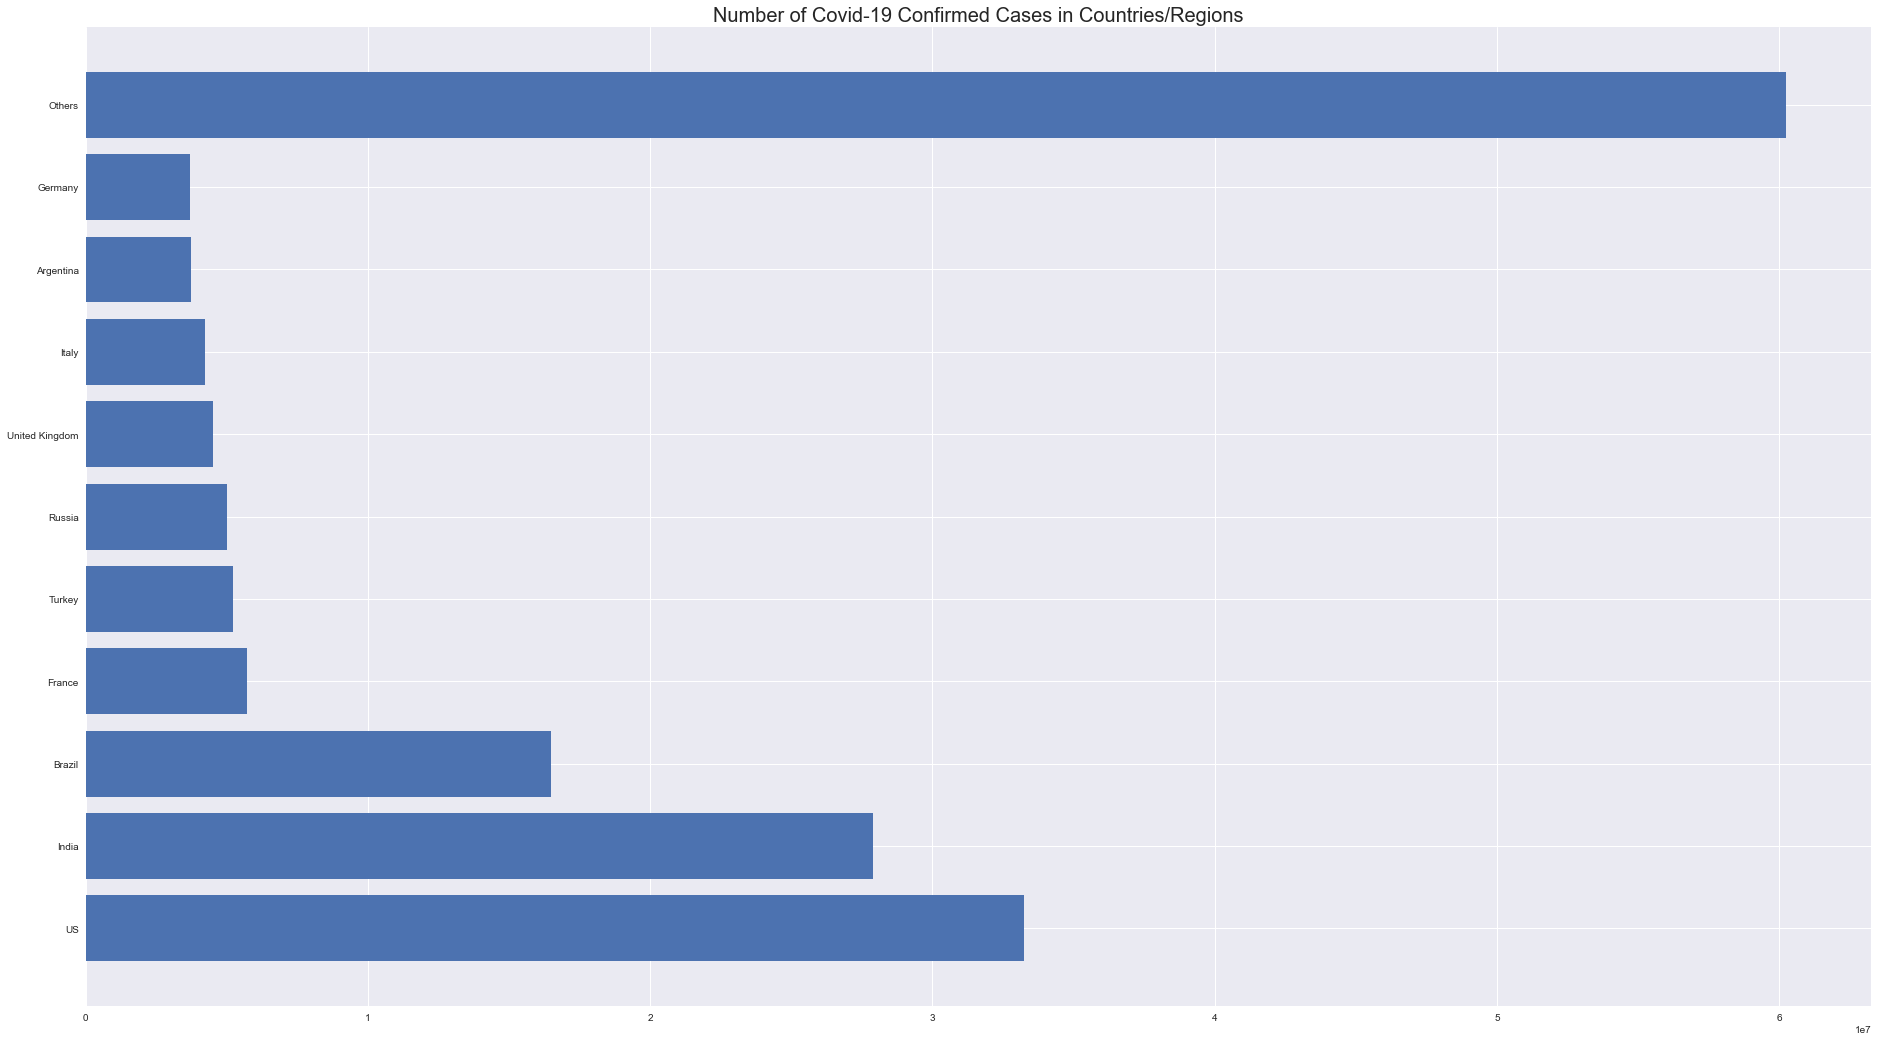

In [36]:
#Visualizing the 10 countries

plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries,visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

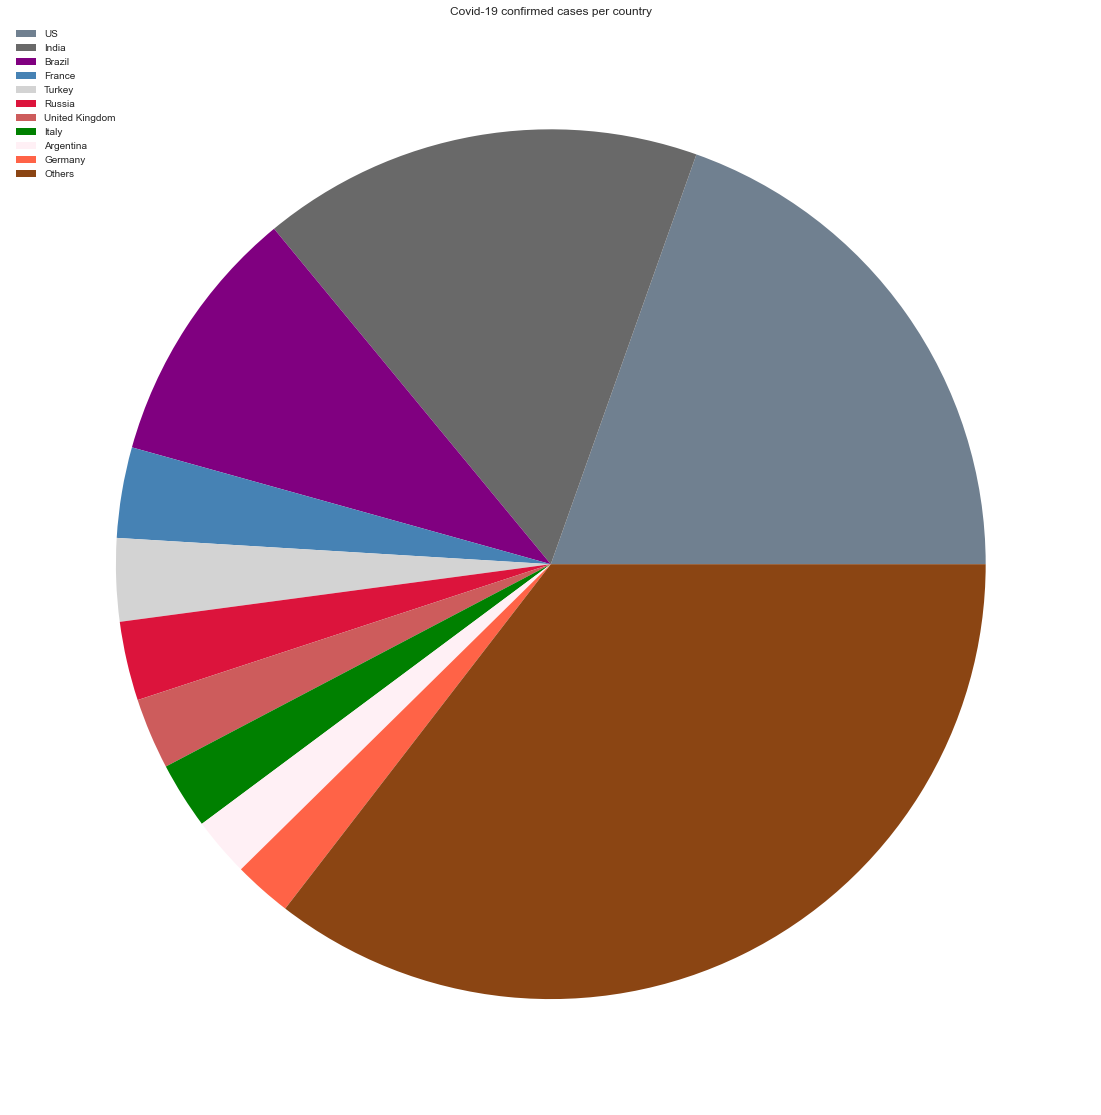

In [37]:
#A pie chart to see the total confirmed cases in 10 different countries

c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 confirmed cases per country')
plt.pie(visual_confirmed_cases,colors=c)
plt.legend(visual_unique_countries,loc='best')
plt.show()

In [38]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_2_21, world_cases, test_size=0.15, shuffle=False)

In [39]:
#Using Linear Regression model to make predictions

from sklearn.linear_model import LinearRegression
linear_model=LinearRegression(normalize=True,fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred=linear_model.predict(X_test_confirmed)
linear_pred=linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))
print('RMSE:', math.sqrt(mean_squared_error(test_linear_pred, y_test_confirmed)))

MAE: 7426816.032182399
MSE: 55431366429413.38
RMSE: 7445224.404234797


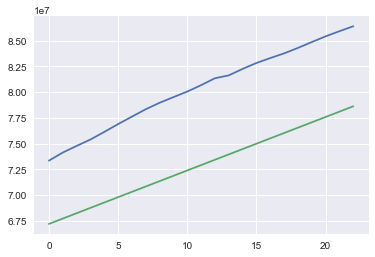

In [40]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

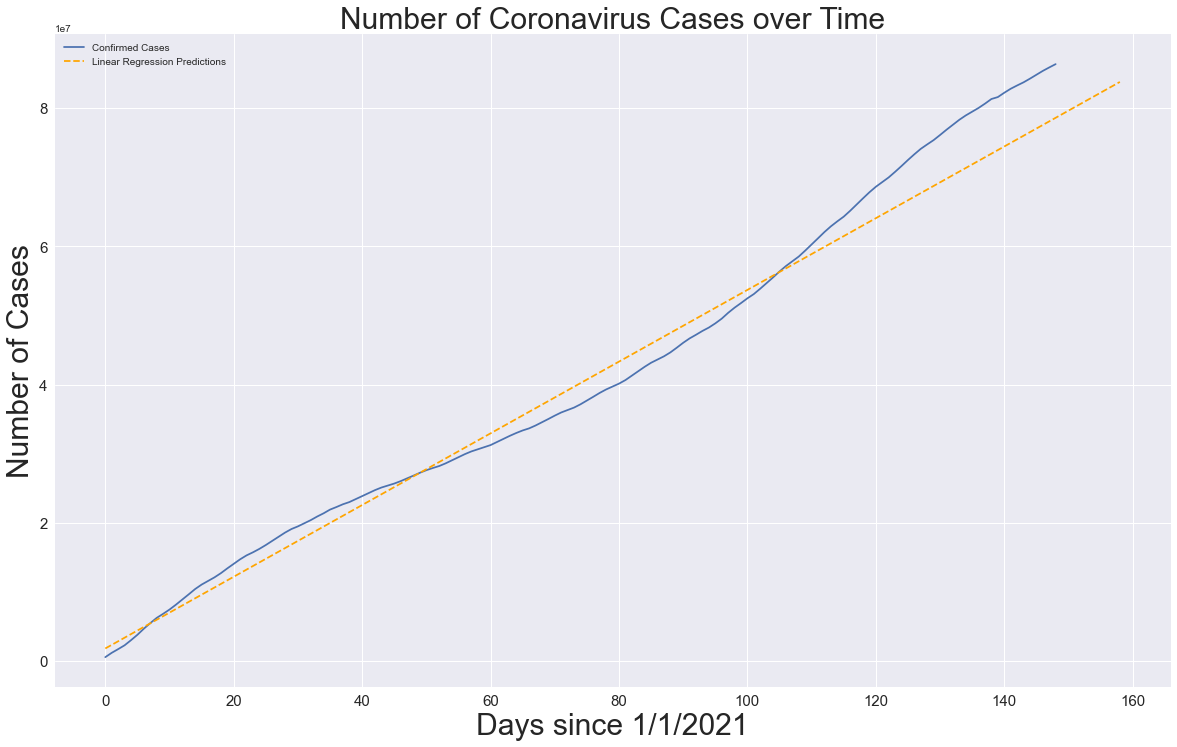

In [41]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast,linear_pred,linestyle='dashed',color='orange')
plt.title('Number of Coronavirus Cases over Time',size=30)
plt.xlabel('Days since 1/1/2021',size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [42]:
#Forecasting for the next 10 days using Linear Regression

print('Linear Regression future predictions:')
print(linear_pred[-10:])

Linear Regression future predictions:
[[79140194.50157532]
 [79659316.40837397]
 [80178438.31517261]
 [80697560.22197127]
 [81216682.12876992]
 [81735804.03556857]
 [82254925.94236721]
 [82774047.84916587]
 [83293169.75596452]
 [83812291.66276316]]


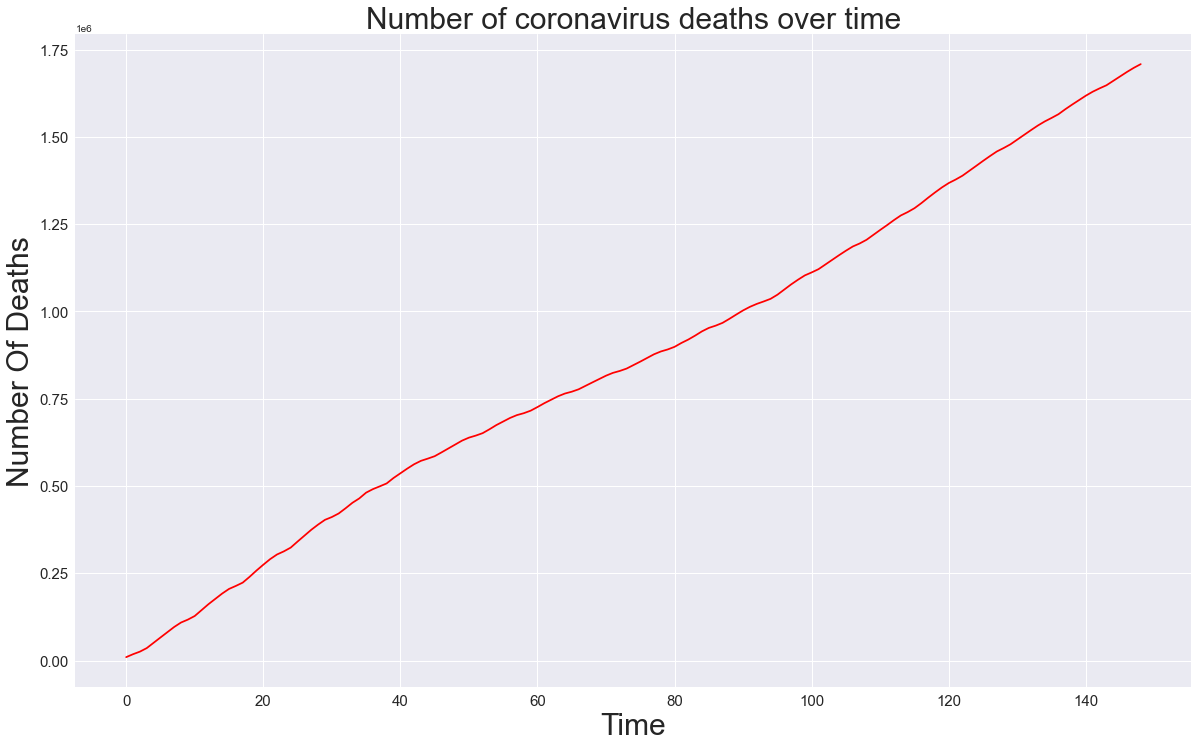

In [43]:
#Total Deaths Over Time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of coronavirus deaths over time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number Of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

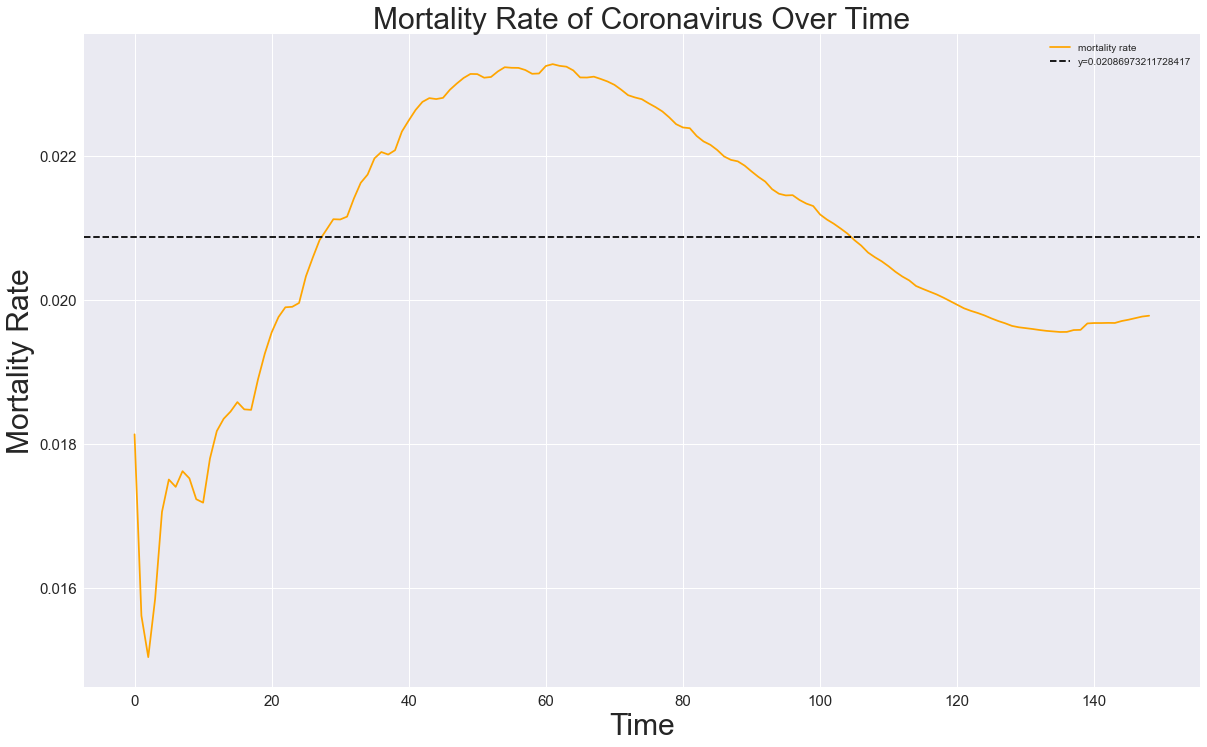

In [44]:
mean_mortality_rate=np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y=mean_mortality_rate, linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time',size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

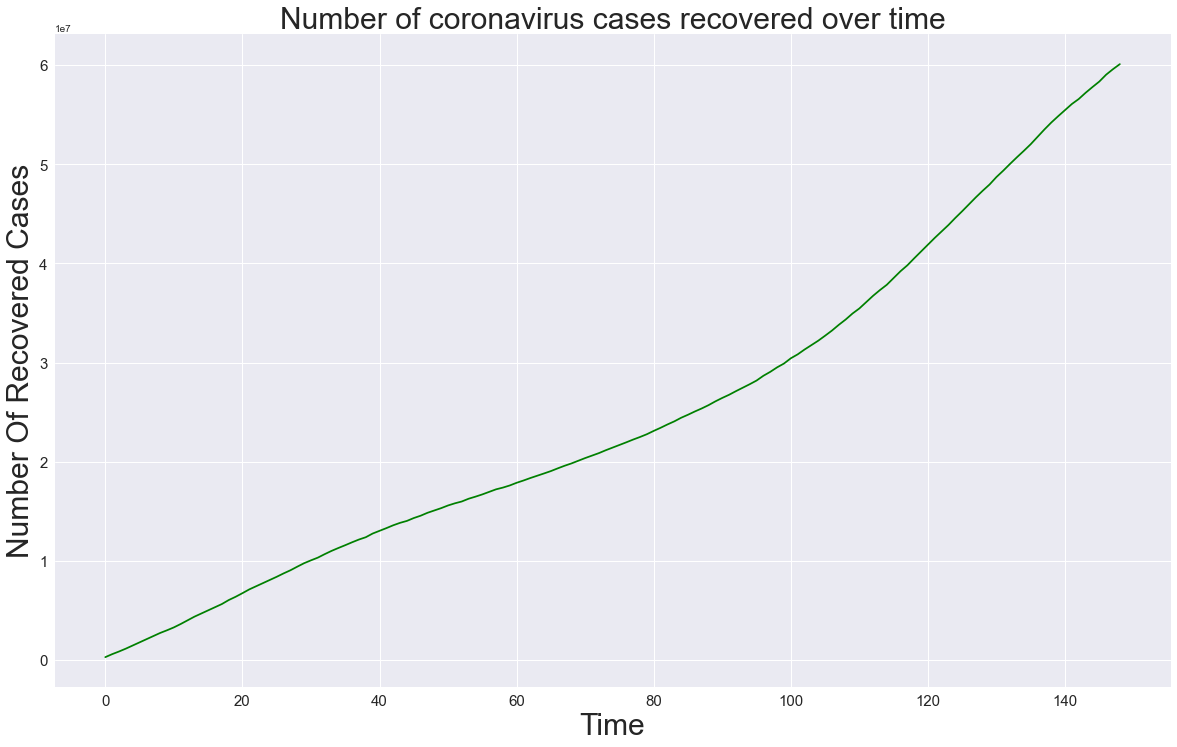

In [45]:
#Coronavirus Cases Recovered Over Time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of coronavirus cases recovered over time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number Of Recovered Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

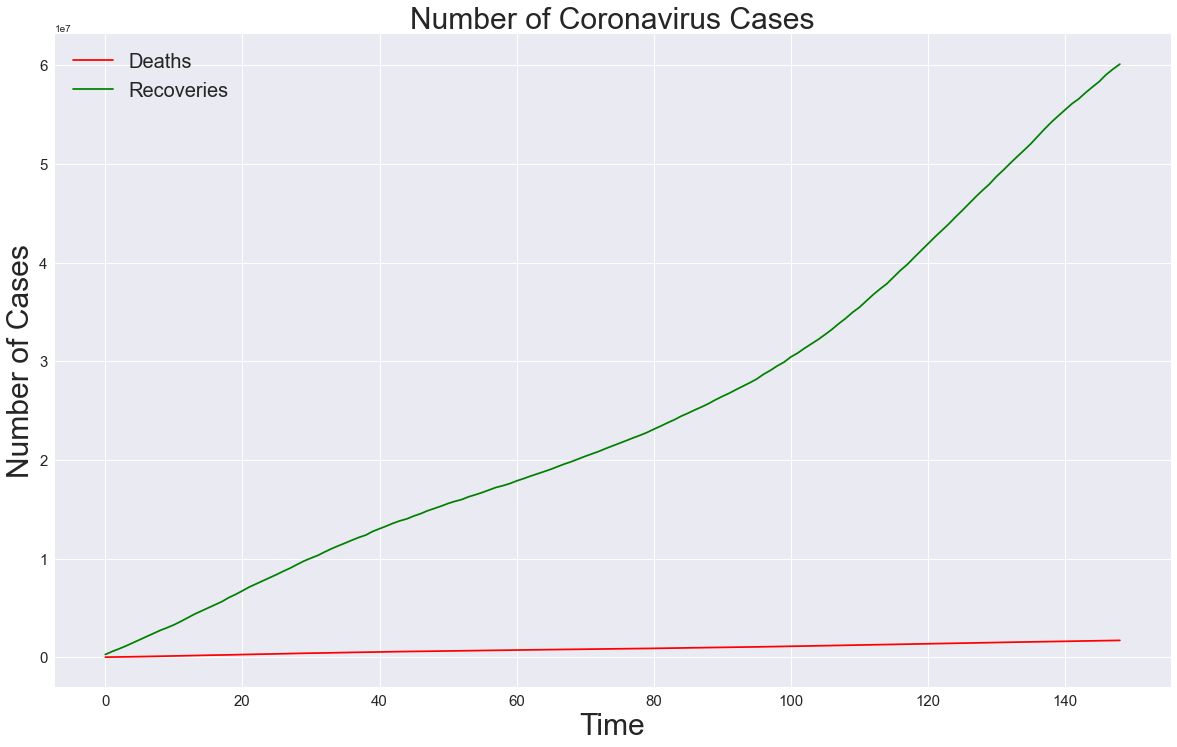

In [46]:
#Number of recovered cases vs number of deaths

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['Deaths', 'Recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time',size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

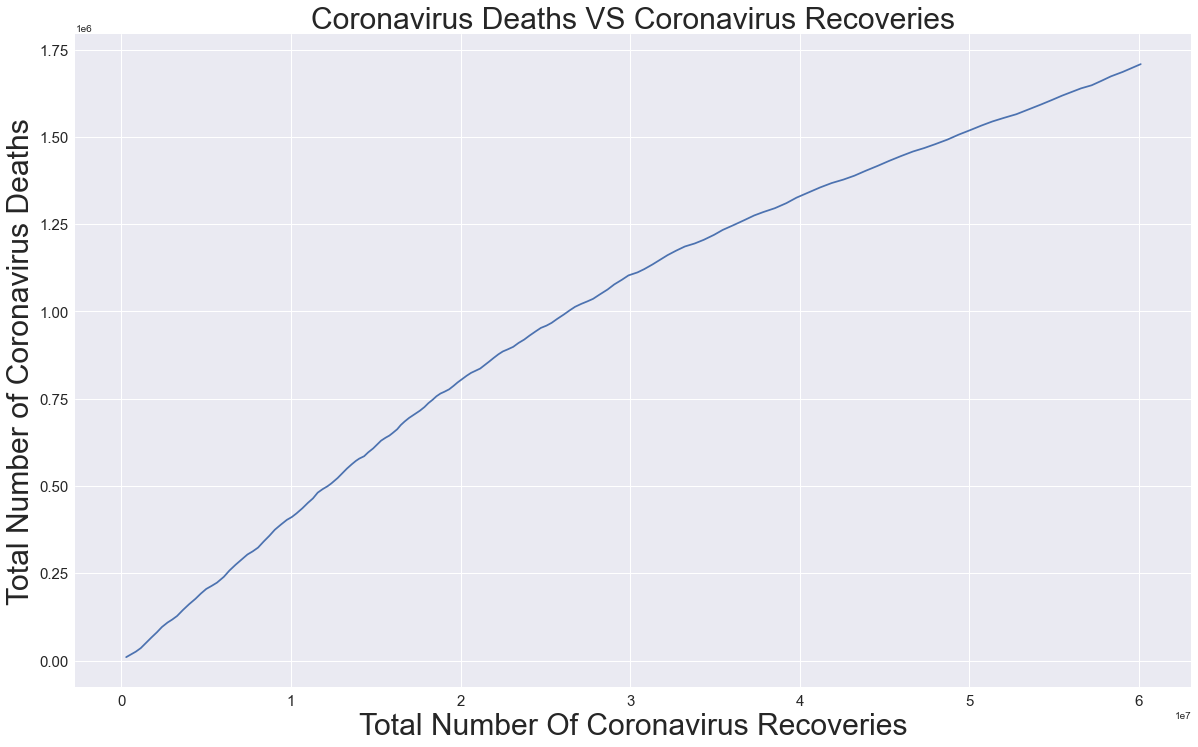

In [47]:
#Coronavirus Deaths vs Recoveries

plt.figure(figsize=(20,12))
plt.plot(total_recovered, total_deaths)
plt.title('Coronavirus Deaths VS Coronavirus Recoveries',size=30)
plt.xlabel('Total Number Of Coronavirus Recoveries',size=30)
plt.ylabel('Total Number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [48]:
cases_india=[]
cases_india=confirmed_cases.loc[confirmed_cases['Country/Region']=='India']
cases_india=cases_india.loc[:,'1/1/21':'5/29/21']
cases_us=[]
cases_us=confirmed_cases.loc[confirmed_cases['Country/Region']=='US']
cases_us=cases_us.loc[:,'1/1/21':'5/29/21']
cases_brazil=[]
cases_brazil=confirmed_cases.loc[confirmed_cases['Country/Region']=='Brazil']
cases_brazil=cases_brazil.loc[:,'1/1/21':'5/29/21']

In [49]:
india=[]
india=np.array(cases_india).reshape(-1,1)
india

array([[10286709],
       [10323965],
       [10340469],
       [10356844],
       [10374932],
       [10395278],
       [10413417],
       [10413417],
       [10450284],
       [10466595],
       [10479179],
       [10495147],
       [10512093],
       [10527683],
       [10542841],
       [10557985],
       [10571773],
       [10581823],
       [10595639],
       [10610883],
       [10625428],
       [10639684],
       [10654533],
       [10667736],
       [10676838],
       [10689527],
       [10701193],
       [10720048],
       [10733130],
       [10746174],
       [10757610],
       [10766245],
       [10777284],
       [10790183],
       [10802591],
       [10814304],
       [10826363],
       [10838194],
       [10847304],
       [10858371],
       [10871294],
       [10880603],
       [10892746],
       [10904940],
       [10916589],
       [10925710],
       [10937320],
       [10950201],
       [10963394],
       [10977387],
       [10991651],
       [11005850],
       [1101

In [50]:
us=[]
us=np.array(cases_us).reshape(-1,1)
us

array([[20252991],
       [20553301],
       [20762047],
       [20946329],
       [21181440],
       [21436884],
       [21715174],
       [22010389],
       [22271084],
       [22484332],
       [22699326],
       [22926246],
       [23156608],
       [23392315],
       [23635046],
       [23836726],
       [24014508],
       [24157924],
       [24334630],
       [24517866],
       [24711684],
       [24902437],
       [25073050],
       [25204112],
       [25356081],
       [25503621],
       [25657566],
       [25826176],
       [25992744],
       [26135056],
       [26247053],
       [26382255],
       [26497588],
       [26619229],
       [26743204],
       [26877601],
       [26981588],
       [27071236],
       [27161551],
       [27257183],
       [27352360],
       [27458120],
       [27557758],
       [27644880],
       [27709901],
       [27764087],
       [27826806],
       [27896924],
       [27966848],
       [28046145],
       [28117670],
       [28174750],
       [2823

In [51]:
brazil=[]
brazil=np.array(cases_brazil).reshape(-1,1)
brazil

array([[ 7700578],
       [ 7716405],
       [ 7733746],
       [ 7753752],
       [ 7810400],
       [ 7873830],
       [ 7961673],
       [ 8013708],
       [ 8075998],
       [ 8105790],
       [ 8131612],
       [ 8195637],
       [ 8256536],
       [ 8324294],
       [ 8393492],
       [ 8455059],
       [ 8488099],
       [ 8511770],
       [ 8573864],
       [ 8638249],
       [ 8697368],
       [ 8753920],
       [ 8816254],
       [ 8844577],
       [ 8871393],
       [ 8933356],
       [ 8996876],
       [ 9058687],
       [ 9118513],
       [ 9176975],
       [ 9204731],
       [ 9229322],
       [ 9283418],
       [ 9339420],
       [ 9396293],
       [ 9447165],
       [ 9447165],
       [ 9524640],
       [ 9524640],
       [ 9599565],
       [ 9659167],
       [ 9713909],
       [ 9765455],
       [ 9809754],
       [ 9834513],
       [ 9866710],
       [ 9921981],
       [ 9978747],
       [10030626],
       [10084208],
       [10139148],
       [10168174],
       [1019

In [52]:
#US 
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(days_since_2_21, us, test_size=0.15, shuffle=False)

In [53]:
#Using Linear Regression model to make predictions
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression(normalize=False,fit_intercept=True)
linear_model.fit(X_train_us, y_train_us)
test_linear_pred=linear_model.predict(X_test_us)
linear_pred=linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_us))
print('MSE:', mean_squared_error(test_linear_pred, y_test_us))
print('RMSE:', math.sqrt(mean_squared_error(test_linear_pred, y_test_us)))
print('Score:', r2_score(test_linear_pred, y_test_us,sample_weight=None))

MAE: 1624487.9913917736
MSE: 2785028707573.2603
RMSE: 1668840.5279035084
Score: -7.736043346945907


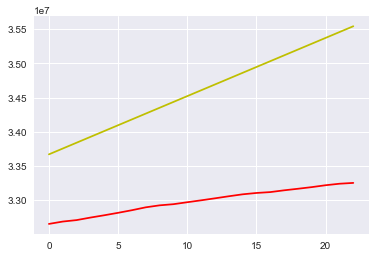

In [54]:
plt.plot(y_test_us,'r')
plt.plot(test_linear_pred,'y')

In [55]:
print('Linear Regression future predictions for US:')
print(linear_pred[-10:])

Linear Regression future predictions for US:
[[35627144.75959405]
 [35712264.66056743]
 [35797384.56154081]
 [35882504.46251419]
 [35967624.36348756]
 [36052744.26446094]
 [36137864.16543432]
 [36222984.0664077 ]
 [36308103.96738108]
 [36393223.86835445]]


In [56]:
#India
X_train_in, X_test_in, y_train_in, y_test_in = train_test_split(days_since_2_21, india, test_size=0.15, shuffle=False)

In [57]:
#Using Linear Regression model to make predictions
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression(normalize=False,fit_intercept=True)
linear_model.fit(X_train_in, y_train_in)
test_linear_pred=linear_model.predict(X_test_in)
linear_pred=linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_in))
print('MSE:', mean_squared_error(test_linear_pred, y_test_in))
print('RMSE:', math.sqrt(mean_squared_error(test_linear_pred, y_test_in)))
print('Score:', r2_score(test_linear_pred, y_test_in,sample_weight=None))

MAE: 8460765.753773866
MSE: 73609320507515.14
RMSE: 8579587.432243764
Score: -469.48634627402765


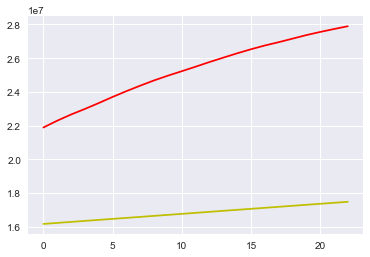

In [58]:
plt.plot(y_test_in,'r')
plt.plot(test_linear_pred,'y')

In [59]:
print('Linear Regression future predictions for US:')
print(linear_pred[-10:])

Linear Regression future predictions for US:
[[17546736.25100962]
 [17606366.49053869]
 [17665996.73006774]
 [17725626.9695968 ]
 [17785257.20912586]
 [17844887.44865492]
 [17904517.68818398]
 [17964147.92771304]
 [18023778.16724209]
 [18083408.40677115]]


In [60]:
#Brazil
X_train_bz, X_test_bz, y_train_bz, y_test_bz = train_test_split(days_since_2_21, brazil, test_size=0.15, shuffle=False)

In [61]:
#Using Linear Regression model to make predictions
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression(normalize=False,fit_intercept=True)
linear_model.fit(X_train_bz, y_train_bz)
test_linear_pred=linear_model.predict(X_test_bz)
linear_pred=linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_bz))
print('MSE:', mean_squared_error(test_linear_pred, y_test_in))
print('RMSE:', math.sqrt(mean_squared_error(test_linear_pred, y_test_bz)))
print('Score:', r2_score(test_linear_pred, y_test_bz,sample_weight=None))

MAE: 183086.9641113112
MSE: 96447596451508.86
RMSE: 186239.6816265246
Score: 0.7801349762244192


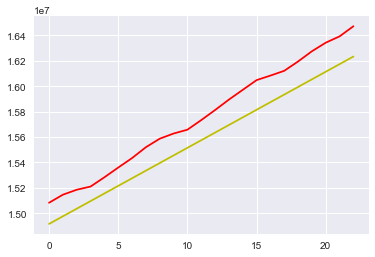

In [62]:
plt.plot(y_test_bz,'r')
plt.plot(test_linear_pred,'y')

In [63]:
print('Linear Regression future predictions for US:')
print(linear_pred[-10:])

Linear Regression future predictions for US:
[[16293096.640027  ]
 [16352974.71211099]
 [16412852.78419498]
 [16472730.85627897]
 [16532608.92836295]
 [16592487.00044695]
 [16652365.07253094]
 [16712243.14461492]
 [16772121.21669891]
 [16831999.2887829 ]]
